In [48]:
pip install emoji

In [2]:
pip install wordcloud

# WhatsApp Chat Analysis

You can use your WhatsApp data for many data science tasks like sentiment analysis, keyword extraction, named entity recognition, text analysis and several other natural language processing tasks. It also depends on who you are analyzing your WhatsApp messages with because you can find a lot of information from your WhatsApp messages which can also help you to solve business problems.

Before starting with the task of WhatsApp Chat analysis with Python you need to extract your WhatsApp data from your smartphone which is a very easy task. To extract your WhatsApp chats, just open any chat with a person or a group and follow the steps mentioned below:

If you are having an iPhone then tap on the Contact Name or the Group Name. In case you are having an Android smartphone then tap on the 3 dots above.
- Then scroll to the bottom and top on Export Chat.
- Then select without media for simplicity if it asks you whether you want your chats with or without media.
- Then email this chat to yourself and download it to your system.
So this is how you can easily get your WhatsApp chats with any person or a group for the task of WhatsApp chat analysis.

In [49]:
import regex as re
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# % matplotlib inline


In [50]:
def startsWithDateAndTime(s):
    pattern = r"[\d]{1,2}/[\d]{1,2}/[\d]{4}" #, r"([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -" # [\d]{1,2}/[\d]{1,2}/[\d]{4} ^([0-9]+)(\/)([0-9]+)(\/)([0-9]+)
    result = re.findall(pattern, s)
    print("result :", result)
    if result:
        return True
    else:
        False



In [51]:
def FindAuthor(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [52]:
def getDataPoint(line):
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(', ')
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(': ')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message


In [54]:
# uploaded = files.upload()
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = "/content/WhatsApp_chat_anil.txt" # path for the whatsapp text file
with open(conversation, encoding="utf-8") as fp:

    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    print("fp.readline() : \n", fp.readline())
    messageBuffer = []
    print("messageBuffer : \n", messageBuffer)
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        print("line: \n", line)


fp.readline() : 
 3/18/23, 1:55 PM - +91 80530 74940: <Media omitted>

messageBuffer : 
 []
line: 
 3/18/23, 1:55 PM - +91 80530 74940: Poochiyo balance isi account ka jo ladt time btaya tha
line: 
 5/1/23, 4:53 PM - +91 80530 74940: Kade mar raha h
line: 
 5/13/23, 1:42 PM - Neeraj Jangra: Delivery call: buy cesc around 70 target 78 stop loss 64
line: 
 5/13/23, 2:26 PM - +91 80530 74940: Ke h yo
line: 
 5/13/23, 2:29 PM - +91 80530 74940: Kisne khi h
line: 
 5/13/23, 2:29 PM - +91 80530 74940: Badhe ga yo
line: 
 5/15/23, 9:34 AM - Neeraj Jangra: Mama 10000 bjde n
line: 
 5/15/23, 9:35 AM - Neeraj Jangra: M shyam n bejduga
line: 
 5/19/23, 10:55 AM - Neeraj Jangra: IMG-20230519-WA0000.jpg (file attached)
line: 
 5/22/23, 12:06 PM - Neeraj Jangra: Jldiii
line: 
 5/22/23, 12:06 PM - +91 80530 74940: Bhej diye
line: 
 5/22/23, 12:06 PM - +91 80530 74940: Saale 210 aagya
line: 
 5/23/23, 11:47 AM - Neeraj Jangra: Kya huaa sir Aaj bhi nhi hoga kya??
line: 
 5/23/23, 11:47 AM - Neeraj Jang

In [57]:
from google.colab import files

# uploaded = files.upload()
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = "/content/WhatsApp_chat_anil.txt" # path for the whatsapp text file
with open(conversation, encoding="utf-8") as fp:

    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    print("fp.readline() : \n", fp.readline())
    messageBuffer = []
    print("messageBuffer : \n", messageBuffer)
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        print("line: \n", line)
        if startsWithDateAndTime(line):
            print("startsWithDateAndTime : \n", startsWithDateAndTime)
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
              messageBuffer.clear()
            date, time, author, message = getDataPoint(line)
            messageBuffer.append(message)

        else:
            messageBuffer.append(line)


Streaming output truncated to the last 5000 lines.
line: 
 7/3/23, 1:22 PM - +91 80530 74940: Konsi
result : []
line: 
 7/3/23, 1:22 PM - Neeraj Jangra: 20 ya 10 rupees upper sell kr de
result : []
line: 
 7/3/23, 1:24 PM - Neeraj Jangra: Tu 19100 call le
result : []
line: 
 7/3/23, 1:24 PM - Neeraj Jangra: Nifty ki
result : []
line: 
 7/3/23, 1:24 PM - Neeraj Jangra: 240 p lele
result : []
line: 
 7/3/23, 1:24 PM - Neeraj Jangra: 250 t upper sell kr de
result : []
line: 
 7/3/23, 1:27 PM - Neeraj Jangra: Mama19150 ebe lele
result : []
line: 
 7/3/23, 1:27 PM - Neeraj Jangra: 195 96 h
result : []
line: 
 7/3/23, 1:27 PM - +91 80530 74940: K
result : []
line: 
 7/3/23, 1:28 PM - Neeraj Jangra: Call
result : []
line: 
 7/3/23, 1:28 PM - Neeraj Jangra: Lele 190 aagi
result : []
line: 
 7/3/23, 1:28 PM - Neeraj Jangra: 200 p sell kr
result : []
line: 
 7/3/23, 1:28 PM - +91 80530 74940: 92 pe leli
result : []
line: 
 7/3/23, 1:29 PM - Neeraj Jangra: Ok
result : []
line: 
 7/3/23, 1:30 PM -

In [58]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

,Date,Time,Author,Message
0,NaT,None,None,"3/18/23, 1:55 PM - +91 80530 74940: Poochiyo b..."


In [59]:
df.Author.unique()

array([None], dtype=object)

In [60]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
# print(media_messages)

def split_count(text):
    data = re.findall(r'\X', text)
    emoji_list = []

    for word in data:
       emojis = emoji.distinct_emoji_list(word)
       emoji_list.extend([emoji.demojize(is_emoji) for is_emoji in emojis])

    # emoji_list = []
    # for word in data:
    #   if any(char in emoji.distinct_emoji_list for char in word):
    #     emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
# print(emojis)
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
# print("Data science Community")
# print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Media: 0
Emojis: 262
Links: 15


In [61]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ['a','b','c'] # list of the authors name in the group

for i in range(len(l)):
    # Filtering out messages of particular user
    req_df= messages_df[messages_df["Author"] == l[i]]
    # req_df will contain messages of only one particular user
    print('\n')
    print(f'Stats of {l[i]} -')
    # shape will print number of rows which indirectly means the number of messages
    print('Messages Sent', req_df.shape[0])
    #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Words per message', words_per_message)
    #media conists of media messages
    media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
    print('Media Messages Sent', media)
    # emojis conists of total emojis
    emojis = sum(req_df['emoji'].str.len())
    print('Emojis Sent', emojis)
    #links consist of total links
    links = sum(req_df["urlcount"])
    print('Links Sent', links)
    # print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      0 non-null      datetime64[ns]
 1   Time      0 non-null      object        
 2   Author    0 non-null      object        
 3   Message   1 non-null      object        
 4   emoji     1 non-null      object        
 5   urlcount  1 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 176.0+ bytes


Stats of a -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0


Stats of b -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0


Stats of c -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0


<ipython-input-61-34d05a4f304b>:19: RuntimeWarning: invalid value encountered in scalar divide
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]


In [62]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
    print(i)

(':beaming_face_with_smiling_eyes:', 59)
(':grinning_squinting_face:', 45)
(':rolling_on_the_floor_laughing:', 42)
(':disappointed_face:', 22)
(':face_with_tears_of_joy:', 16)
(':thumbs_up:', 13)
(':face_with_monocle:', 12)
(':loudly_crying_face:', 9)
(':grinning_face_with_big_eyes:', 9)
(':fearful_face:', 4)
(':smiling_face_with_halo:', 4)
(':cowboy_hat_face:', 3)
(':face_holding_back_tears:', 3)
(':smiling_face_with_sunglasses:', 3)
(':grinning_face_with_smiling_eyes:', 3)
(':down_arrow:', 2)
(':rocket:', 2)
(':face_with_peeking_eye:', 2)
(':waving_hand:', 1)
(':spiral_calendar:', 1)
(':seven_o’clock:', 1)
(':backhand_index_pointing_down_light_skin_tone:', 1)
(':tumbler_glass:', 1)
(':bikini:', 1)
(':sun_with_face:', 1)
(':OK_hand_light_skin_tone:', 1)
(':middle_finger:', 1)


There are 97530 words in all the messages.


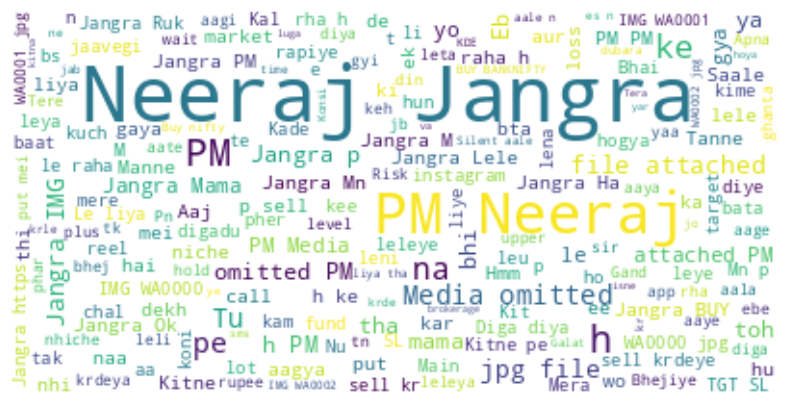

In [63]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
messages_df.head(10)

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
0,NaT,None,None,"3/18/23, 1:55 PM - +91 80530 74940: Poochiyo b...","[:waving_hand:, :spiral_calendar:, :seven_o’cl...",15,97530,16800,1


In [74]:
#Wordcloud Auther wise
l = ['Neeraj Jangra','+91 80530 74940']

for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
    #Generate a word cloud image
    print('Author name',l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    #Display the generated image
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Author name Neeraj Jangra


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [67]:
l = ["None"]
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
    #Generate a word cloud image
    print('Author name',l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    #Display the generated image
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Author name None


ValueError: We need at least 1 word to plot a word cloud, got 0.